<a href="https://colab.research.google.com/github/chauhansrc/Machine-Learning/blob/main/Lesson_2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn 
import pandas as pd
import numpy as np


In [2]:
!pip install opendatasets --quiet

**There are following steps to modeling any machine learning problem:**
* Step 1 : We initialise any model with some random parameters like weights and biases.
* Step 2: We provide input to the model to obtain some parameters.
* Step 3: These predictions are then compared to the actual targets using an error function.
* Step 4: We use optimization techniques to redcue the loss by changing weights and biases.
* Step 5: We repeat the above steps until our model is good enough.

<img src = https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png width = 400px>

**Linear regression :**  the target is modeled as a linear combination (or weighted sum) of input features.

The predictions of the model are evaluated using a loss function like RMSE or Root Mean Square Error.
<img src="https://i.imgur.com/iTM2s5k.png" width="480">

**Logistic Regression :** Used to solve binary classification problem.
* Step 1: We take a linear combination (weighted sum of input features).
* Step 2: We apply a sigmoid fucntion to obtain a number betweeen 0 and 1. (**This is the probability of the the input being classified as "YES"**)
* Step 3: Insted of RMSE, the **cross entropy loss function** is used to evaluate the results.
<img src = "https://i.imgur.com/YMaMo5D.png" width = 500px>

**Sigmoid Function:**

<img src = "https://i.imgur.com/sAVwvZP.png" width = 400px>


In [3]:
import opendatasets as od

In [4]:
rain_df = od.download("https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: shadeofshadow
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 119MB/s]

In [5]:
rain_df = pd.read_csv('./weather-dataset-rattle-package/weatherAUS.csv')
df = rain_df

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

*   The dataset contains 145460 entries and has 23 columns.
*   We will use only 21 columns containing useable features for predicting weather (excluding Date and RainTomorrow since they don't help in predicting). 
*   <b>Objective :</b> To predict values in column RainTomorrow.



<b> Issues </b>
* There are a lot of null values in RainToday and RainTomorrow.

NOTE: Currently only removing values from critical column ( RainToday and RainTomorrow). We should figure out some issues case by case and some null issues need to handled at the very begining, i.e critical columns.

In [8]:
df.dropna(subset = ["RainToday", "RainTomorrow"], inplace = True)

## Exploratory Data Analysis

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
px.histogram(df, x = "Location", title = 'Location vs. Rainy Days', color = 'RainToday')

In [11]:
use_sample = False

In [12]:
sample_fraction = 0.1

In [13]:
if use_sample:
  df = df.sample(frac = sample_fraction).copy()

## Training, Validation and Test Sets

While building a real world machine learning models, its quite common to split the dataset into three parts.


1.   **Training Set** : Used to train model; computing the loss and optimizing the model.
2.   **Validation Set** : Used to evaluate the model during training, tune model hyperparameters, and pick the best version of the model. Picking a good validation set is essential for training models that generalize well.
3.   **Test Set**: Used to compare different models or approaches and report the mode's final accuracy. The test set should reflect the kind of data the model will encounter in the real world, as closely ad feasible.

As a general rule of thumb you can use around 
**60% of the data for the training set, 20% for the validation set and 20% for the test set.**

If a **separate test set** is already provided, you can use a **75%-25% training-validation split.**



In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_val_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [16]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)



train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


**Important Note**

When working **with dates**, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

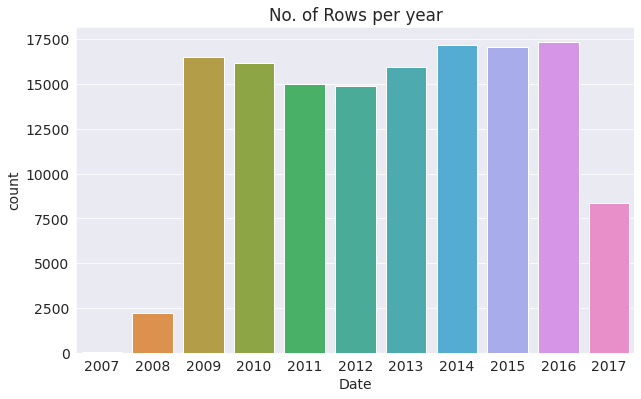

In [17]:
plt.title("No. of Rows per year")
sns.countplot( x = pd.to_datetime(df.Date).dt.year);

In [18]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015 ]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [19]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [20]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [21]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [22]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


## Input columns and Target Columns

Not all the columns will be used for training the model, in this case **Date** and **RainTomorrow** cannot be used to train the model.

* Date cannot be used because we only want to make prediction whether it will rain the next day or not. 

* RainTomorrow cannot be used since it's the target column, i.e, this column will be predicted so it can't be used to train the model.

In [23]:
input_cols = list(train_df.columns)[1:-1]
target_col = "RainTomorrow"

In [24]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [25]:
a = [1,2,3,4,5]
print(a[-1])

5


In [26]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [27]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [28]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [29]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97988 entries, 0 to 144552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       97988 non-null  object 
 1   MinTemp        97674 non-null  float64
 2   MaxTemp        97801 non-null  float64
 3   Rainfall       97988 non-null  float64
 4   Evaporation    61657 non-null  float64
 5   Sunshine       57942 non-null  float64
 6   WindGustDir    91120 non-null  object 
 7   WindGustSpeed  91160 non-null  float64
 8   WindDir9am     90969 non-null  object 
 9   WindDir3pm     96036 non-null  object 
 10  WindSpeed9am   97114 non-null  float64
 11  WindSpeed3pm   96919 non-null  float64
 12  Humidity9am    96936 non-null  float64
 13  Humidity3pm    96872 non-null  float64
 14  Pressure9am    88876 non-null  float64
 15  Pressure3pm    88857 non-null  float64
 16  Cloud9am       63000 non-null  float64
 17  Cloud3pm       61966 non-null  float64
 18  Temp9

**Trick to select Numeric and Categorical columns**

In [30]:
numeric_cols = train_inputs.select_dtypes(np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

****

In [31]:
train_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [32]:
train_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

##Imputing Missing Numeric Data
**Imputation :** The process of filling missing numeric values is called imputation.

There are several techniques for imputing data, like puting in the average value of the column in place of NaN. To do that we'll use **SimpleImputer** class from **sklearn.impute.**

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy = 'mean')

In [35]:
df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

Using Imputer is like using any other method or model of the sklearn library, in the first step we **imputer.fit** to fit the data according to the strategy provided. 

In this case, imputer calculates mean of all the *numeric_cols* of the *df*.This can be viewed using **imputer.statistics_** method.

In [36]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [37]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

The missing values in the training, test and validation sets can now be filled in using **imputer.transform**.

In [38]:
imputer.transform(train_inputs[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

In [39]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [40]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

##Feature Scaling

Some columns have high range of values while sum have lower range of values. Due to this the higher values tend to dominate the loss more than the lower values and since it dominates the loss, it also tends to dominate optimization.

In such case, the best way is to give every column a level playing field by normalizing them, i.e, Making every value be in the range of (0,1) or (-1,1).

This can be done using **MinMaxScaler()** from **sklearn.preprocessing.**

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [43]:
scaler = MinMaxScaler()

In [44]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [45]:
print("Minimum: ", scaler.data_min_)

Minimum:  [ -8.5  -4.8   0.    0.    0.    6.    0.    0.    0.    0.  980.5 977.1
   0.    0.   -7.2  -5.4]


In [46]:
print("Maximum: ", scaler.data_max_)


Maximum:  [  33.9   48.1  371.   145.    14.5  135.   130.    87.   100.   100.
 1041.  1039.6    9.     9.    40.2   46.7]


In [47]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [48]:
train_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


## Encoding Categorical Data

**One Hot Encoding :** It adds a **new binary columns for each unique category** of a categorical column.

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  estimators, notably linear models and SVMs with the standard ker

In [51]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [52]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [53]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

We can generate column names for each individual category using *get_feature_names*.

In [54]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

All the above columns will be added to train_inputs, val_inputs and test_inputs when we transform those dataframes.

In [55]:
train_inputs.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [56]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols]) 
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]) 


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented 

In [57]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Saving Inputs to Disk

We can use **parquet** to save the files to disk, so that we don't have to run the preprocessing steps every time.

In [58]:
print("train_inputs.shape: ", train_inputs.shape)
print("train_targets.shape: ", train_targets.shape)
print("val_inputs.shape: ", val_inputs.shape)
print("train_targets.shape: ", train_targets.shape)
print("test_inputs.shape: ", test_inputs.shape)
print("train_targets.shape: ", train_targets.shape)


train_inputs.shape:  (97988, 123)
train_targets.shape:  (97988,)
val_inputs.shape:  (17089, 123)
train_targets.shape:  (97988,)
test_inputs.shape:  (25710, 123)
train_targets.shape:  (97988,)


In [59]:
!pip install pyarrow --quiet


In [60]:
#Creating a parquet file of the inputs
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [61]:
#Creating parquet file of the targets
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')


In [62]:
#Reading the data back using pd.read_parquet
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

In [63]:
print("train_inputs.shape: ", train_inputs.shape)
print("train_targets.shape: ", train_targets.shape)
print("val_inputs.shape: ", val_inputs.shape)
print("train_targets.shape: ", train_targets.shape)
print("test_inputs.shape: ", test_inputs.shape)
print("train_targets.shape: ", train_targets.shape)

train_inputs.shape:  (97988, 123)
train_targets.shape:  (97988,)
val_inputs.shape:  (17089, 123)
train_targets.shape:  (97988,)
test_inputs.shape:  (25710, 123)
train_targets.shape:  (97988,)


## Logistic Regression Model

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [66]:
model = LogisticRegression(solver = 'liblinear' )


We can train the model using **`model.fit`**.

`LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`



In this step:

**LogisticRegression()** has a `max_iter = 100` and `tol=0.0001`, which means it will run until 100 iterations or until the loss goes below the given tolerance (here less than 0.01%).



In [67]:
%%time
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

CPU times: user 1.69 s, sys: 81.3 ms, total: 1.78 s
Wall time: 1.78 s


LogisticRegression(solver='liblinear')

In [68]:
print(numeric_cols + encoded_cols)
print(model.coef_.tolist())
print(model.intercept_)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [69]:
weight_df = pd.DataFrame({
    "feature": numeric_cols + encoded_cols,
    "weight" : model.coef_.tolist()[0]
})

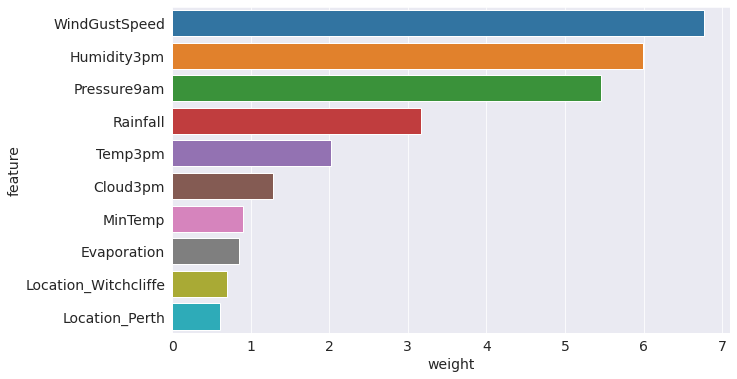

In [70]:
#plt.figure(figsize = (10, 50))
sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x = 'weight', y = 'feature')

In [71]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]


In [72]:
train_preds = model.predict(X_train)

In [73]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values int `train_preds` and `train_tragets`.

This can be done using the accuracy_score function from `sklearn_metrics`.

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(train_targets, train_preds)

0.8519206433440829

If we want to get probability we can use `predic_proba`.

In [76]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94401112, 0.05598888],
       [0.94074168, 0.05925832],
       [0.96093614, 0.03906386],
       ...,
       [0.98749119, 0.01250881],
       [0.98334685, 0.01665315],
       [0.87453486, 0.12546514]])

In [77]:
model.classes_

array(['No', 'Yes'], dtype=object)

The accuracy we achieved is 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

**Confusion Matrix :**

<img src = "https://i.imgur.com/UM28BCN.png" width = 600px>


High Number of False Negatives will cause problems like there's a match tomorrow but we predicted that there's no rain tomorrow but tomorrow it rains then the match will be cancelled.


High Number of False Positives will cause problems like mislabling a valid transaction as credit card fraud.

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [80]:
def predict_and_plot(inputs, targets, name = ''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f} :".format(accuracy*100))
  cf = confusion_matrix(targets, preds, normalize = 'true')
  plt.figure()
  sns.heatmap(cf, annot = True)
  plt.xlabel("Prediction")
  plt.ylabel("Target")
  plt.title("{} Confusion Matrix".format(name))

  return preds

Accuracy: 85.19 :


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

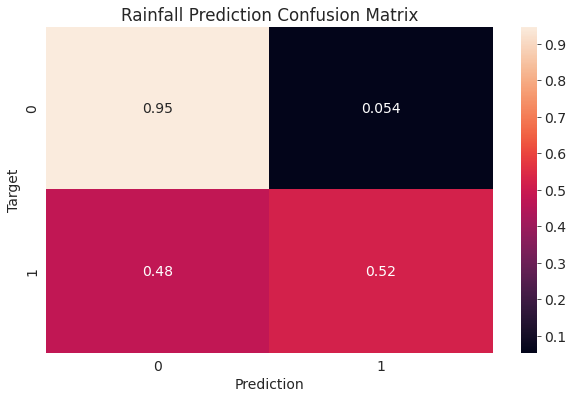

In [81]:
predict_and_plot(X_train, train_targets, name = "Rainfall Prediction")

Accuracy: 85.40 :


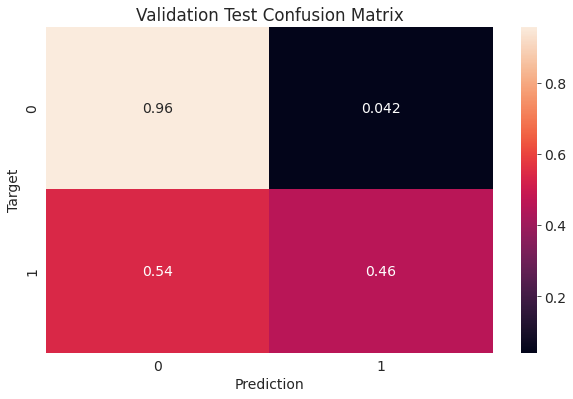

In [82]:
val_preds = predict_and_plot(X_val,  val_targets, 'Validation Test')

Accuracy: 84.20 :


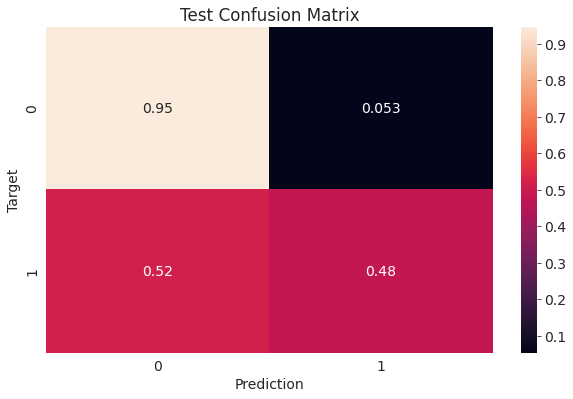

In [83]:
test_preds = predict_and_plot(X_test, test_targets, "Test" )

In [84]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [85]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [86]:
accuracy_score(test_targets, random_guess(X_test))

0.499611046285492

In [87]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Our model is performing better than these baseline models. It is always better to benchmark any model with such baseline models

**Data Leak** : When some information from the target is leaks into the inputs.

## Saving and Loading Trained Models


We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk.

In [88]:
import joblib

Let's create a dictionary containing all the required objects.

In [89]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

Save this to `joblib.dump`

In [90]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

It can be loaded back using `joblib.load`

In [91]:
aussie_rain2 = joblib.load('aussie_rain.joblib')